In [5]:
import os, sys
import gymnasium as gym
import time
import numpy as np

import text_flappy_bird_gym

In [6]:
class SARSA_TDControl():
    def __init__(self, 
                 space_size, 
                 action_size, 
                 gamma=1, 
                 lr_v=0.01):
        """
        Calculates optimal policy using in-policy Temporal Difference control
        Evaluates Q-value for (S,A) pairs, using one-step updates.
        """        
        # the discount factor
        self.gamma = gamma
        # size of system
        self.space_size = space_size # as tuple
        self.action_size = action_size

        # the learning rate
        self.lr_v = lr_v
        
        # where to save returns
        self.Qvalues = np.zeros( (*self.space_size, self.action_size) )
    
    # -------------------   
    def single_step_update(self, s, a, r, new_s, new_a, done):
        """
        Uses a single step to update the values, using Temporal Difference for Q values.
        Employs the EXPERIENCED action in the new state  <- Q(S_new, A_new).
        """
        if done:
            
            
            # CODE HERE!
            # deltaQ = R - Q(s,a)
            
            deltaQ = (r + 0 - self.Qvalues[ (*s, a) ])
        else:
            
            # CODE HERE!
            # deltaQ = R + gamma*Q(new_s, new_a) - Q(s,a)
            
            deltaQ = (r + 
                      self.gamma * self.Qvalues[ (*new_s, new_a) ] 
                                 - self.Qvalues[ (*    s,     a) ])
            
        self.Qvalues[ (*s, a) ] += self.lr_v * deltaQ
        
    # ---------------------
    def get_action_epsilon_greedy(self, s, eps):
        """
        Chooses action at random using an epsilon-greedy policy wrt the current Q(s,a).
        """
        ran = np.random.rand()
        
        # CODE HERE!
        
        if (ran < eps):
            # probability is uniform for all actions!
            prob_actions = np.ones(self.action_size) / self.action_size 
        
        else:
            # I find the best Qvalue
            best_value = np.max(self.Qvalues[ (*s,) ])
            
            # There could be actions with equal value! 
            best_actions = ( self.Qvalues[ (*s,) ] == best_value )


            # best_actions is 
            # *True* if the value is equal to the best (possibly ties)
            # *False* if the action is suboptimal
            prob_actions = best_actions / np.sum(best_actions)
            
        # take one action from the array of actions with the probabilities as defined above.
        a = np.random.choice(self.action_size, p=prob_actions)
        return a 
        
    def greedy_policy(self):
        
        # CODE HERE!
        
        a = np.argmax(self.Qvalues, axis = 2)
        return a

In [11]:
env = gym.make('TextFlappyBird-v0', height = 15, width = 20, pipe_gap = 4)
n_episodes = 10000
Actions = [0, 1] # flap / no flap
observation_space = (env.observation_space[0].n, env.observation_space[1].n)

# Initialize 
epsilon0 = 0.15
lr_v0 = 0.60

SARSA = SARSA_TDControl(space_size=observation_space, action_size=2, gamma=1, lr_v=lr_v0)
performance_traj_SARSA_decay = np.zeros(n_episodes)

count = 0
tstar = 25000

epsilon = epsilon0

# RUN OVER EPISODES
for i in range(n_episodes):
    done = False

    s, info = env.reset()
    a = SARSA.get_action_epsilon_greedy(s, epsilon)
    act = Actions[a]
    
    while not done:
        count += 1
        # Evolve one step
        new_s, r, done, _, info = env.step(act)
        
        # Keeps track of performance for each episode
        performance_traj_SARSA_decay[i] += r
        
        # Choose new action index
        new_a = SARSA.get_action_epsilon_greedy(new_s, epsilon)
        #print(s,act,a, r,new_s,new_a, done, ' Qvalue ', SARSA.Qvalues[(*s,)])
        # (Corresponding action to index)
        act = Actions[new_a]
        # Single update with (S, A, R', S', A')
        SARSA.single_step_update(s, a, r, new_s, new_a, done)

        if count > tstar:
            # epsilon = epsilon0/(1. + 0.0005*(count - tstar)**1.05)
            SARSA.lr_v = lr_v0/(1 + 0.003*(count - tstar)**0.75)
            
        
        a = new_a
        s = new_s

Qvalues = SARSA.Qvalues

Text(0.5, 1.0, 'SARSA cumulative rewards with decaying epsilon')

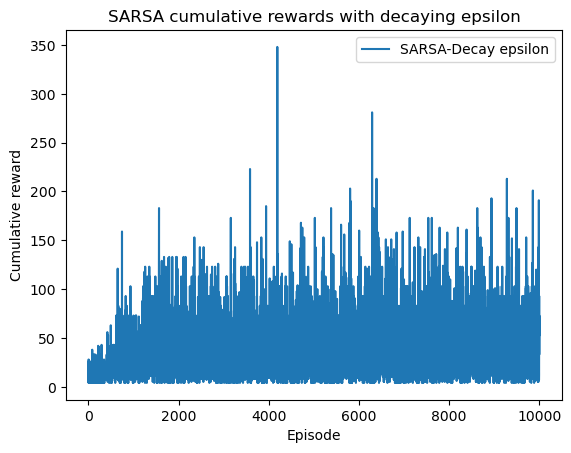

In [8]:
import matplotlib.pyplot as plt # lr_v0 = 0.15

plt.plot(performance_traj_SARSA_decay, label='SARSA-Decay epsilon')
plt.xlabel('Episode')
plt.ylabel('Cumulative reward')
plt.legend()
plt.title("SARSA cumulative rewards with decaying epsilon")

Text(0.5, 1.0, 'SARSA cumulative rewards with decaying epsilon')

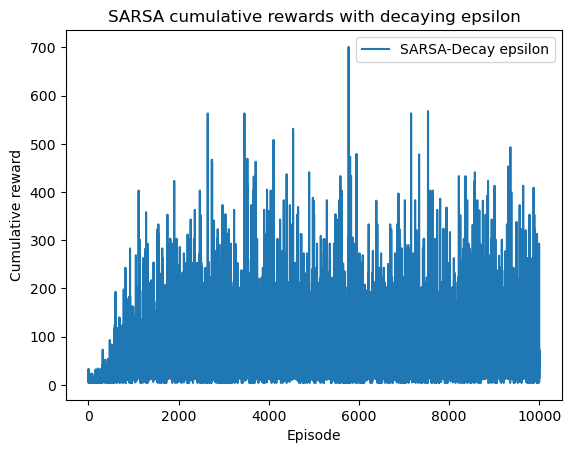

In [10]:
import matplotlib.pyplot as plt # lr_v0 = 0.40

plt.plot(performance_traj_SARSA_decay, label='SARSA-Decay epsilon')
plt.xlabel('Episode')
plt.ylabel('Cumulative reward')
plt.legend()
plt.title("SARSA cumulative rewards with decaying epsilon")

Text(0.5, 1.0, 'SARSA cumulative rewards with decaying epsilon')

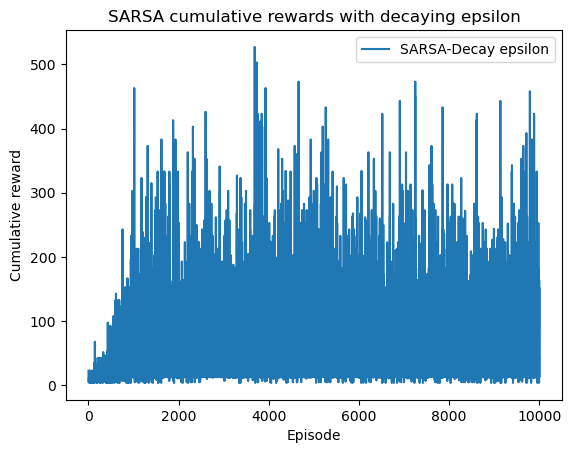

In [12]:
import matplotlib.pyplot as plt # lr_v0 = 0.40

plt.plot(performance_traj_SARSA_decay, label='SARSA-Decay epsilon')
plt.xlabel('Episode')
plt.ylabel('Cumulative reward')
plt.legend()
plt.title("SARSA cumulative rewards with decaying epsilon")